In [1]:
#!pip

## r1_correctLC

In [2]:
from astropy import stats #for MAD

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from lightkurve import LightCurve
import astropy.units as u
import logging
#import batman-package as batman
#batman = __import__("batman-package")
import matplotlib
#from basic_functions import stop

logging.basicConfig(format='%(asctime)s %(levelname)s: %(name)s(%(funcName)s): %(message)s', level=logging.DEBUG)

import tessutils #NOT the normal utils!


2019-12-08 19:16:07,418 DEBUG: matplotlib.pyplot(switch_backend): Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [4]:
import matplotlib.pyplot as plt
from astropy.table import Table
import astropy.units as u
from astropy.io import fits 
import os
from lightkurve import LightCurve
from lightkurve import BoxLeastSquaresPeriodogram as BLS
#import lightkurve as lk
import requests
import gzip 
import pickle

import logging
logger = logging.getLogger(__name__)

import subprocess
from matplotlib import rc

import os
import shutil

In [5]:
lc = None
folderName = 'tess2018206045859-s0001-0000000092352620-0120-s'
downloadDir = 'CleanPath/LowMags/TIC_92352620/' #Path must flow like this

lc_load, sectors = tessutils.loadLC(folderName, downloadDir, fluxType="PDCSAP", normalised=True)
lcOri = lc_load.copy()


2019-12-08 19:16:07,545 INFO: tessutils(loadLC): Cadence is 2 min for CleanPath/LowMags/TIC_92352620/tess2018206045859-s0001-0000000092352620-0120-s\tess2018206045859-s0001-0000000092352620-0120-s_lc.fits
D:\Python\Anaconda\lib\site-packages\lightkurve\lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


In [6]:
#plt.rc('font', family="Times New Roman")
#plt.rc('font', size=14)

In [7]:
time = max(lc_load.time)-min(lc_load.time)
time
lc_load == lcOri

False

In [8]:
time = max(lc_load.time)-min(lc_load.time)
lcTransit = lc_load.copy()
def gridfreq(lc, N=10):
    periods=[]
    phases=[]
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        plt.scatter(phase, (lcTransit.flux-1.)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods


#gridfreq(lcTransit)

## Coloring of Outliers

2019-12-09 14:06:41,938 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:41,959 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:41,959 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-12-09 14:06:43,055 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:43,073 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:43,074 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


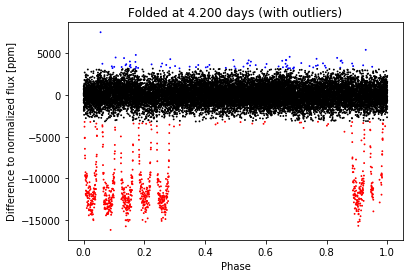

Min phase = 0.00021572539671266795
Max phase = 0.9999874097720507


2019-12-09 14:06:44,893 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:44,915 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:44,916 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-12-09 14:06:46,017 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:46,034 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:46,035 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


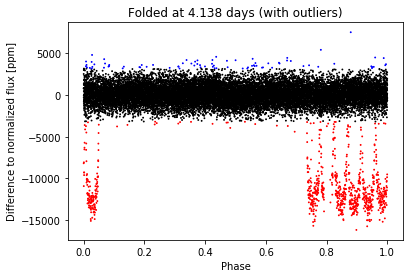

Min phase = 2.9455455762763835e-05
Max phase = 0.9999873878824166


2019-12-09 14:06:47,884 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:47,902 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:47,903 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-12-09 14:06:49,048 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:49,067 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:49,068 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


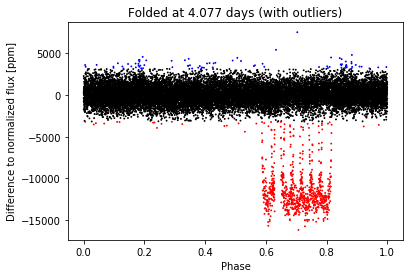

Min phase = 1.4497286457853828e-05
Max phase = 0.9999648050716061


2019-12-09 14:06:50,922 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:50,943 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:50,945 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-12-09 14:06:52,035 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:52,052 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:52,053 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


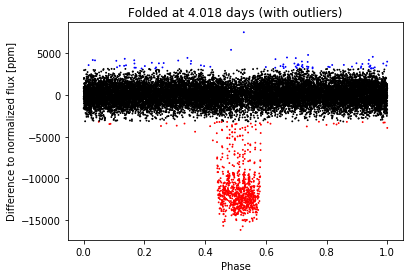

Min phase = 5.4411237550700185e-05
Max phase = 0.999994274033674


2019-12-09 14:06:53,893 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:53,912 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:53,913 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-12-09 14:06:55,008 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:55,027 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:55,028 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


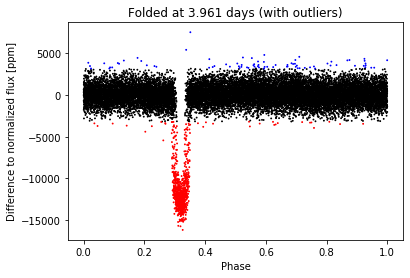

Min phase = 1.275455748357759e-05
Max phase = 0.9999635383093668


2019-12-09 14:06:56,875 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:56,895 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:56,896 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-12-09 14:06:58,091 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:58,108 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:58,108 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


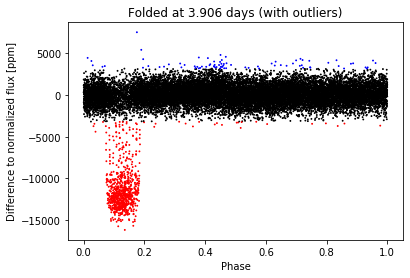

Min phase = 4.404899216269717e-05
Max phase = 0.9999511778575677


2019-12-09 14:06:59,966 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:06:59,986 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:06:59,987 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-12-09 14:07:01,065 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'D:\\Python\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2019-12-09 14:07:01,081 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font D:\Python\Anaconda\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2019-12-09 14:07:01,082 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


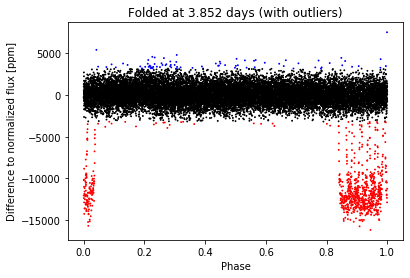

Min phase = 1.8469737561051028e-05
Max phase = 0.9999700941460338


[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [461]:
lcTransit = lc_load.copy()
def gridfreq_col(lc, N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    obstime = lc.time-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        
        flux_nomad = lc.flux-1
        mad = stats.median_absolute_deviation(lc.flux)
        std = np.std(flux_nomad)
        
        col = ['k']*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad >= 4*mad)] = 'b'
        col[np.where(flux_nomad <= -4*mad)] = 'r'
        ind_norm = np.where(col == 'k')
        ind_outl_pos = np.where(col == 'b')
        ind_outl_neg = np.where(col == 'r')
        
        #Now plot number of outliers PER WINDOW, and see if this it matches with the colored light curve.
        
        ##Outlier removal below
        #flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
        
        plt.scatter(phase, (lcTransit.flux-1.)*1e6, marker=".", color=col, s=3)
        plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_markedout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        print('Min phase = ' + str(min(phase)))
        print('Max phase = ' + str(max(phase)))
        periods.append(period)
        phases.append(phase)
    return periods

gridfreq_col(lcTransit)

## Removal of Outliers (with astropy)

In [10]:
lcTransit = lc_load.copy()
def gridfreq(lc,N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        ##Outlier removal below
        flux_nomad = lc.flux-1
        mad = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ##Outlier removal above
        plt.scatter(phase, (flux_mad)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

#gridfreq(lcTransit)

In [11]:
lcTransit = lc_load.copy()
#test = BLS.from_lightcurve(lcTransit)
test = BLS.from_lightcurve(lcTransit)
test2 = BLS.get_transit_model(test)
#test2.period_at_max_power
test2.time = test2.time-test2.time[0]
#test2.plot()

No period specified. Using period at max power
2019-12-08 19:16:07,769 WARNING: lightkurve.periodogram(get_transit_model): No period specified. Using period at max power
No duration specified. Using duration at max power
2019-12-08 19:16:07,770 WARNING: lightkurve.periodogram(get_transit_model): No duration specified. Using duration at max power
No transit time specified. Using transit time at max power
2019-12-08 19:16:07,771 WARNING: lightkurve.periodogram(get_transit_model): No transit time specified. Using transit time at max power


## Shifting to first transit (Works)

In [12]:
test = BLS.from_lightcurve(lcTransit)
test2 = BLS.get_transit_model(test)
test2.time = test2.time-test2.time[0]
indextest = np.where(test2.flux == min(test2.flux))[0]
indextest[0]

No period specified. Using period at max power
2019-12-08 19:16:07,926 WARNING: lightkurve.periodogram(get_transit_model): No period specified. Using period at max power
No duration specified. Using duration at max power
2019-12-08 19:16:07,927 WARNING: lightkurve.periodogram(get_transit_model): No duration specified. Using duration at max power
No transit time specified. Using transit time at max power
2019-12-08 19:16:07,928 WARNING: lightkurve.periodogram(get_transit_model): No transit time specified. Using transit time at max power


2002

In [13]:
test = BLS.from_lightcurve(lcTransit)
test2 = BLS.get_transit_model(test)
test3 = BLS.from_lightcurve(test2)

No period specified. Using period at max power
2019-12-08 19:16:08,075 WARNING: lightkurve.periodogram(get_transit_model): No period specified. Using period at max power
No duration specified. Using duration at max power
2019-12-08 19:16:08,076 WARNING: lightkurve.periodogram(get_transit_model): No duration specified. Using duration at max power
No transit time specified. Using transit time at max power
2019-12-08 19:16:08,077 WARNING: lightkurve.periodogram(get_transit_model): No transit time specified. Using transit time at max power


In [14]:
per = test.period_at_max_power
#print(per)
#BLS.show_properties(test)

In [15]:
#I will need the period/phase right before and after transit, not just period at max transit.
N=12
model = BLS.get_transit_model(test)
time = max(model.time)-min(model.time)
for i in np.arange(1/4.8, 1/3.6, (1/time * 1/N)):
    period = 1/i
    phase = (lc.time % period)
    plt.plot(phase, model.flux)
    plt.title("BLS Transit Model at {} days".format('%.3f'%(period)))
    plt.show()

## Plotting a Phase Fold via BoxLeastSquares

In [16]:
def phasefold(lc):
    time = max(lc.time)-min(lc.time)
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value #value in days
    phase = (lc.time % period)
    plt.scatter(phase, (lc.flux-1.)*1e6, marker=".", color="k", s=3)
    plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
    plt.xlabel("Phase")
    plt.ylabel("Difference to normalized flux [ppm]")
    #plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
    plt.show()

#phasefold(lcTransit)

## Plotting a Phase Fold via BoxLeastSquares (with Outlier Removal)

In [17]:
def phasefold2(lc):
    time = max(lc.time)-min(lc.time)
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    #period = 2.9
    phase = (lc.time % period)
    
    flux_nomad = lc.flux-1
    mad = stats.median_absolute_deviation(lc.flux)
    std = np.std(flux_nomad)
        
    col = ['k']*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad >= 4*mad)] = 'cyan'
    col[np.where(flux_nomad <= -4*mad)] = 'r'
    ind_norm = np.where(col == 'k')
    ind_outl_pos = np.where(col == 'cyan')
    ind_outl_neg = np.where(col == 'r')
    
    flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)

    plt.scatter(phase, (flux_mad)*1e6, marker=".", color=col, s=3)
    plt.title("Folded at {} days".format('%.3f'%(period)))
    plt.xlabel("Phase")
    plt.ylabel("Difference to normalized flux [ppm]")
    #plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
    plt.show()

#phasefold2(lcTransit)

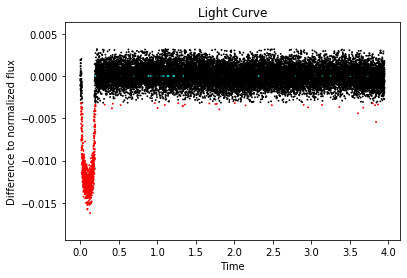

In [393]:
def phasefold3(lc):
    time = max(lc.time)-min(lc.time)
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    phase = (lc.time % period)
    
    flux_nomad = lc.flux-1
    mad = stats.median_absolute_deviation(lc.flux)
    std = np.std(flux_nomad)
        
    col = ['k']*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad >= 4*mad)] = 'cyan'
    col[np.where(flux_nomad <= -4*mad)] = 'r'
    ind_norm = np.where(col == 'k')
    ind_outl_pos = np.where(col == 'cyan')
    ind_outl_neg = np.where(col == 'r')
    
    flux_mad = np.where(flux_nomad >= 4*mad, 0, flux_nomad)
    flux_notrans = np.where(flux_mad <= -4*mad, 0, flux_mad) #This is no transit as well as no other outliers at all. Not good.

    plt.figure()
    #plt.scatter(phase, (lcTransit.flux-1.), marker=".", color=col, s=3)
    #plt.figure()
    plt.scatter(phase, flux_mad, marker=".", color=col, s=3)
    plt.title("Light Curve")
    plt.xlabel("Time")
    plt.ylabel("Difference to normalized flux")
    #plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
    plt.show()

phasefold3(lcTransit)

In [19]:
tt = test.transit_time
per = test.period
dur = test.duration
stt = np.sort(tt)
tt

array([0.17919576, 0.03706271, 0.06982083, ..., 4.31717612, 1.64494344,
       4.12763253])

In [20]:
tt = test.transit_time
print(tt)

[0.17919576 0.03706271 0.06982083 ... 4.31717612 1.64494344 4.12763253]


In [21]:
time = lc_load.time-lc_load.time[0]
tottime = max(lc_load.time)-min(lc_load.time)
tottime/per.value

array([110.84902671, 110.75931232, 110.66959794, ...,   3.19176744,
         3.10205305,   3.01233867])

In [22]:
tottime = max(lc_load.time)-min(lc_load.time)
time = (lc_load.time-lc_load.time[0])
bls = BLS.from_lightcurve(lc_load)
period = bls.period_at_max_power
period = period.value #/ 1.3
dur = bls.duration_at_max_power
dur = dur.value
phase = (lc_load.time % period)
period - time[2002]

1.1029417049750085

## Removing Main Transit

No period specified. Using period at max power
2019-12-09 13:42:47,910 WARNING: lightkurve.periodogram(get_transit_model): No period specified. Using period at max power
No duration specified. Using duration at max power
2019-12-09 13:42:47,911 WARNING: lightkurve.periodogram(get_transit_model): No duration specified. Using duration at max power
No transit time specified. Using transit time at max power
2019-12-09 13:42:47,913 WARNING: lightkurve.periodogram(get_transit_model): No transit time specified. Using transit time at max power


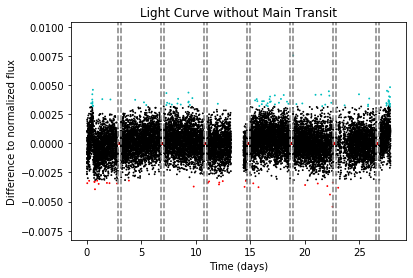

In [424]:
#%matplotlib notebook
def phasefold4(lc):
    tottime = max(lc.time)-min(lc.time)
    time = (lc.time-lc.time[0])
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    dur = bls.duration_at_max_power
    dur = dur.value
    phase = (lc.time % period)
    
    flux_nomad = lc.flux-1
    mad = stats.median_absolute_deviation(lc.flux)
    std = np.std(flux_nomad)
         
    col = ['k']*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad >= 4*mad)] = 'cyan'
    col[np.where(flux_nomad <= -4*mad)] = 'r'
    ind_norm = np.where(col == 'k')
    ind_outl_pos = np.where(col == 'cyan')
    ind_outl_neg = np.where(col == 'r')
    
    number_of_trans = int(np.ceil(tottime/period))

    model = BLS.get_transit_model(bls)
    model.time = model.time-model.time[0]
    firsttrans_ind = np.where(model.flux == min(model.flux))[0]
    firsttrans = firsttrans_ind[0]
    #const = period - time[2002] #Works for TIC9235... 
    const = period - time[firsttrans]
    
    for k in range (1, number_of_trans):
        trans_start = (k*period)-const
        trans_end = (k*period)-const + (dur)
        plt.axvline(x=(k*period)-const, c='gray', linestyle='--')
        plt.axvline(x=(k*period)-const + (dur), c='gray', linestyle='--')
        for j in range (0, len(time)):
            if trans_start < time[j] and time[j] < trans_end:
                flux_nomad[j]=0
            else:
                flux_nomad[j]=flux_nomad[j]
        flux_notrans = flux_nomad
    
    #flux_notrans = np.where(flux_notrans >= 4*mad, 0, flux_notrans)
    
    plt.scatter(time, flux_notrans, marker=".", color=col, s=3)
    plt.title("Light Curve without Main Transit")
    plt.xlabel("Time (days)")
    plt.ylabel("Difference to normalized flux")
    #plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
    plt.show()

phasefold4(lcOri)

No period specified. Using period at max power
2019-12-08 19:16:10,381 WARNING: lightkurve.periodogram(get_transit_model): No period specified. Using period at max power
No duration specified. Using duration at max power
2019-12-08 19:16:10,381 WARNING: lightkurve.periodogram(get_transit_model): No duration specified. Using duration at max power
No transit time specified. Using transit time at max power
2019-12-08 19:16:10,382 WARNING: lightkurve.periodogram(get_transit_model): No transit time specified. Using transit time at max power


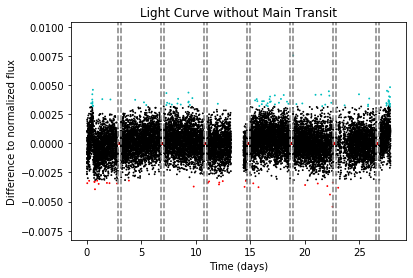

In [24]:
phasefold4(lcTransit)

In [25]:
#%matplotlib notebook
def removetrans(lc):
    tottime = max(lc.time)-min(lc.time)
    time = (lc.time-lc.time[0])
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    dur = bls.duration_at_max_power
    dur = dur.value
    phase = (lc.time % period)
    
    flux_nomad = lc.flux-1
    number_of_trans = int(np.ceil(tottime/period))

    model = BLS.get_transit_model(bls)
    model.time = model.time-model.time[0]
    firsttrans_ind = np.where(model.flux == min(model.flux))[0]
    firsttrans = firsttrans_ind[0]
    #const = period - time[2002] #Works for TIC9235... 
    const = period - time[firsttrans]
    
    for k in range (1, number_of_trans):
        trans_start = (k*period)-const
        trans_end = (k*period)-const + (dur)
        for j in range (0, len(time)):
            if trans_start < time[j] and time[j] < trans_end:
                flux_nomad[j]=0
            else:
                flux_nomad[j]=flux_nomad[j]
    flux_notrans = flux_nomad
    
    #flux_notrans = np.where(flux_notrans >= 4*mad, 0, flux_notrans)
    
    return flux_notrans

#removetrans(lcOri)

No period specified. Using period at max power
2019-12-08 19:16:11,320 WARNING: lightkurve.periodogram(get_transit_model): No period specified. Using period at max power
No duration specified. Using duration at max power
2019-12-08 19:16:11,321 WARNING: lightkurve.periodogram(get_transit_model): No duration specified. Using duration at max power
No transit time specified. Using transit time at max power
2019-12-08 19:16:11,322 WARNING: lightkurve.periodogram(get_transit_model): No transit time specified. Using transit time at max power


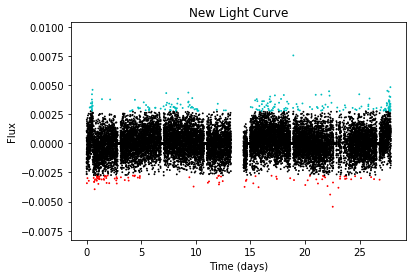

In [26]:
notrans = removetrans(lcTransit)
std = np.std(notrans)
mad = stats.median_absolute_deviation(notrans)
col_new = ['k']*len(notrans)
col_new = np.array(col_new)
col_new[np.where(notrans >= 4*mad)] = 'cyan'
col_new[np.where(notrans <= -4*mad)] = 'r'
plt.scatter(lcTransit.time-min(lcTransit.time), notrans, marker=".", color=col_new, s=3)
plt.title('New Light Curve')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.show()

In [27]:
def window1(a, w=100, o=10, copy=False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    print(a.strides)
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    #return (o-w, o+w)
    
#def window2(a, startpos):
    #a[N:N+11]
    
def count1(a, mad, std):
    firstapps = []
    #firstapp = (mad-lc)/std
    firstapp = (a - mad)/std
    for i in range (0, len(firstapp)):
        if firstapp[i] < std:
            firstapp[i] = 1
        else:
            firstapp[i] = 0
    firstapps.append(firstapp)
    outlier_count = np.count_nonzero(firstapps)
    return outlier_count

## Window Sliding

In [28]:
def window(a, w=50, o=5, copy=False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    #return (o-w, o+w)
    
#def window2(a, startpos):
    #a[N:N+11]
    
def count2(a, mad):
    firstapps = []
    #firstapp = (mad-lc)/std
    #firstapp = (a - mad)/std
    #firstapp = a
    firstapp = np.zeros(len(a))
    for i in range (0, len(a)):
        if a[i] <= -4*mad:
            firstapp[i] = 1
        else:
            firstapp[i] = 0
    firstapps.append(firstapp)
    outlier_count = np.count_nonzero(firstapp)
    return outlier_count

def count3(a, mad):
    firstapps = []
    firstapp = a
    firstapp[np.where(a >= 4*mad)] = 0
    firstapp[np.where(a <= -4*mad)] = 1
    outlier_count = np.count_nonzero(firstapp)
    return outlier_count


## Counting Outliers In Terms of Phase (Works!)

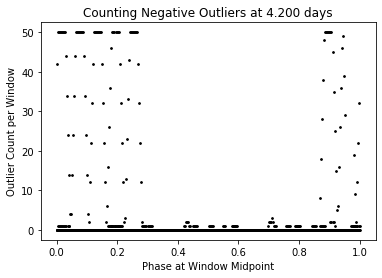

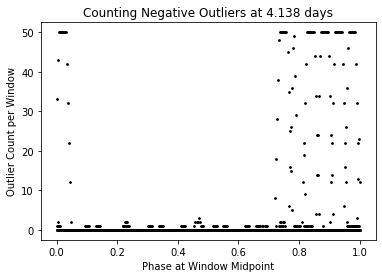

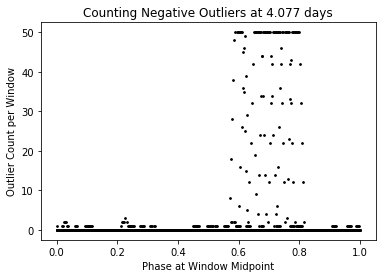

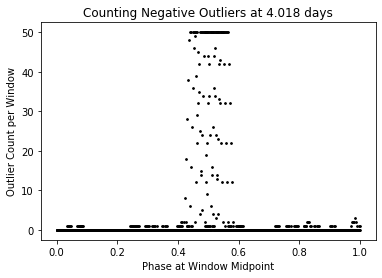

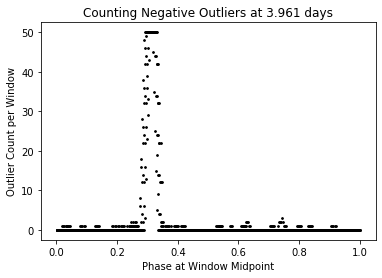

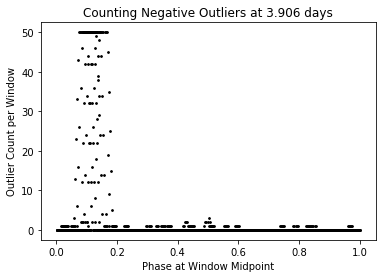

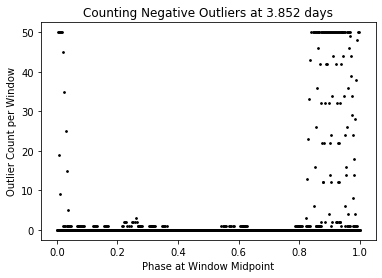

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [462]:
def gridfreqcount(lc, upper=4.2, lower=3.8, N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/upper, 1/lower, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ## Pos outlier removal above
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        #print(len(col))
        windows = window(col, w=50, o=10)
        window_phase = window(phase, w=50, o=10)
        #print(windows[50])
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        #print(counts)
        plt.scatter(window_phase[:,0], counts, marker="o", color="k", s=3)
        #plt.scatter(phase, (flux_mad)*1e6, marker=".", color="k", s=3)
        plt.title("Counting Negative Outliers at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase at Window Midpoint")
        plt.ylabel("Outlier Count per Window")
        #plt.savefig(os.path.join(downloadDir,"NegCount_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreqcount(lcTransit)

[1.33146353e-03 2.69057296e-03 4.11378666e-03 1.20167904e-02
 4.29162414e-02 5.67061478e-02 7.07757282e-02 7.35231247e-02
 7.63359883e-02 8.14589349e-02 1.12359247e-01 1.26148826e-01
 1.42966799e-01 1.42997759e-01 1.50901070e-01 1.51335962e-01
 1.81802235e-01 1.95591499e-01 2.12410468e-01 2.19386438e-01
 2.20343195e-01 2.20475005e-01 2.22169267e-01 2.51245208e-01
 2.65034168e-01 2.81854133e-01 2.89785309e-01 2.94386227e-01
 2.94391455e-01 3.20688168e-01 3.40032246e-01 3.51297794e-01
 3.59359774e-01 3.60616251e-01 3.63830471e-01 3.63835863e-01
 3.90131116e-01 4.10863758e-01 4.20741451e-01 4.30058335e-01
 4.34669155e-01 4.37441364e-01 4.59574053e-01 4.83084119e-01
 4.90185103e-01 4.99500403e-01 5.06891331e-01 5.09663366e-01
 5.29016981e-01 5.53915621e-01 5.59628752e-01 5.68942451e-01
 5.77724615e-01 5.83274248e-01 5.98459900e-01 6.26135972e-01
 6.29072396e-01 6.38384476e-01 6.38518106e-01 6.58274008e-01
 6.67902811e-01 6.70780098e-01 6.98516036e-01 7.09467140e-01
 7.29107110e-01 7.373457

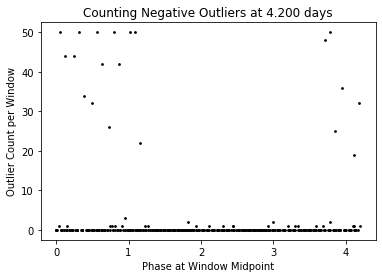

[0.01364018 0.03093481 0.03206621 0.03637708 0.04673503 0.04994736
 0.08308307 0.10582145 0.10897946 0.10984371 0.11617766 0.11939116
 0.15252596 0.17526581 0.18562028 0.18623232 0.19022384 0.22196884
 0.24471016 0.2550629  0.25706539 0.26522314 0.29141171 0.31693229
 0.32450552 0.32789845 0.33536151 0.33605581 0.36224344 0.38637664
 0.39394813 0.40012039 0.4054996  0.43446402 0.45582098 0.46339074
 0.47095345 0.47494338 0.47702388 0.50390688 0.52526532 0.53283334
 0.54438716 0.5520216  0.56817527 0.57334973 0.59470975 0.60227594
 0.61383094 0.62840815 0.63761943 0.64279258 0.66554309 0.67171854
 0.68327471 0.70706359 0.70896125 0.71223543 0.73637642 0.74116112
 0.75271847 0.77650773 0.77840356 0.78167827 0.80582086 0.81060371
 0.82216224 0.84595188 0.85250996 0.86312318 0.87526529 0.88004629
 0.891606   0.91539601 0.92195279 0.93256549 0.94609861 0.94948886
 0.96243863 0.98483988 0.99139562 1.00200779 1.01893143 1.02804303
 1.04021562 1.05428372 1.06083845 1.07145009 1.088374   1.1016

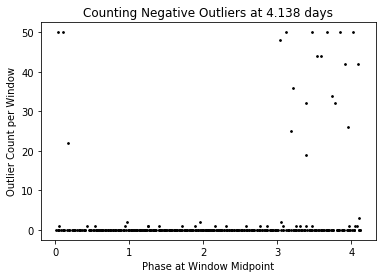

[0.0103907  0.02303307 0.03041125 0.05874906 0.05978074 0.07514239
 0.08122239 0.09247694 0.09985383 0.12819137 0.13061337 0.14875348
 0.15066523 0.16192077 0.16929641 0.20839037 0.21291099 0.21958678
 0.22010805 0.23414235 0.23873898 0.2439089  0.27783411 0.2823533
 0.28955088 0.29042008 0.30358617 0.30818155 0.31335351 0.34727785
 0.3517956  0.3695867  0.37149341 0.37302999 0.37762412 0.3827981
 0.41811046 0.4212379  0.44180887 0.44232508 0.4424738  0.44706668
 0.45224267 0.48894306 0.4906802  0.51125326 0.51176789 0.51191761
 0.51650924 0.52168723 0.56012249 0.58136141 0.58199765 0.58259955
 0.58486432 0.58595179 0.59113178 0.62956478 0.65080521 0.65144136
 0.65204236 0.65539433 0.65569759 0.66057632 0.69900707 0.72024901
 0.72088506 0.72287401 0.72483687 0.72514197 0.73002084 0.76844935
 0.79032876 0.79108167 0.79231681 0.79427941 0.79597523 0.79946536
 0.83789162 0.85977245 0.86052545 0.86372194 0.86890988 0.8742593
 0.89041957 0.90872274 0.92921613 0.92996923 0.93316447 0.9397432

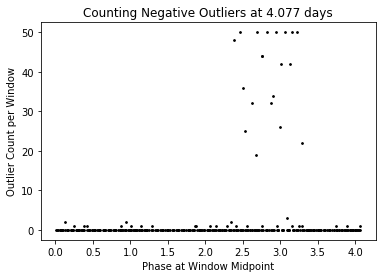

[0.02497701 0.03458502 0.04327317 0.04416716 0.05193703 0.06334204
 0.067547   0.0944215  0.10402756 0.1163893  0.12138071 0.12521567
 0.13278581 0.13698928 0.16386599 0.17347009 0.19082438 0.19465845
 0.19555586 0.20222958 0.20643156 0.23331048 0.24291262 0.26026803
 0.26410123 0.26638909 0.27583997 0.27726267 0.30275496 0.31235514
 0.32971168 0.33493287 0.3466726  0.34670494 0.36222228 0.37497721
 0.38179766 0.3991553  0.40437564 0.41611636 0.4161472  0.43166662
 0.44442168 0.45124017 0.47381841 0.48556011 0.48558946 0.50111095
 0.51386614 0.52207153 0.54326117 0.55503171 0.55639273 0.57055527
 0.5833106  0.59568059 0.61270394 0.62447396 0.62722535 0.63999959
 0.65414395 0.66512309 0.68353556 0.69391621 0.69666908 0.70944391
 0.72497729 0.73595443 0.75297832 0.76335845 0.76611281 0.77888822
 0.79442174 0.80678577 0.82242107 0.83280069 0.83555654 0.84833252
 0.86386619 0.87622826 0.89186382 0.90363178 0.91750013 0.91777682
 0.93331063 0.94983728 0.96130657 0.97307401 0.98722112 1.0027

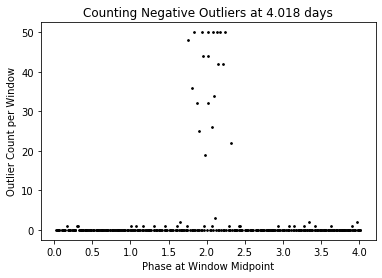

[0.01096633 0.01866754 0.02523002 0.04652546 0.06532647 0.07551118
 0.08040858 0.08811184 0.09467278 0.12013656 0.13615781 0.14985082
 0.15755613 0.16411553 0.16717688 0.20560029 0.20624765 0.21929306
 0.22700041 0.23355827 0.23939834 0.27846985 0.27920932 0.29012414
 0.29922246 0.30300101 0.30884205 0.3486518  0.35346982 0.35956638
 0.36866674 0.37244375 0.37828575 0.42430313 0.42900861 0.43059391
 0.44188648 0.44227766 0.46995143 0.49652532 0.49845083 0.50003638
 0.51132921 0.51172193 0.540784   0.56596972 0.57364538 0.57622612
 0.58077194 0.58394396 0.61161656 0.63680302 0.64705719 0.65021465
 0.66033264 0.67780906 0.68244911 0.70902519 0.7164994  0.72382393
 0.73533243 0.75328167 0.77985848 0.78197273 0.78594161 0.79604435
 0.80477667 0.82260105 0.82272534 0.85677267 0.85835942 0.86548706
 0.87291396 0.87838756 0.8920441  0.89216901 0.9303814  0.93492976
 0.94235835 0.95060957 0.96148712 0.96161267 0.97918925 1.00260129
 1.00437245 1.01180273 1.02422045 1.03093013 1.03105633 1.0666

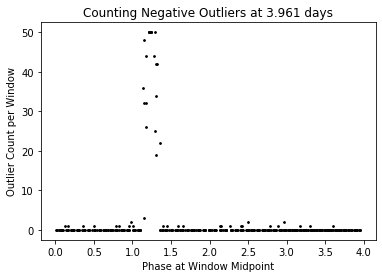

[0.00433866 0.00448173 0.01293335 0.01647557 0.02597986 0.05074714
 0.05973353 0.07378233 0.07670373 0.08237774 0.08869599 0.12018935
 0.12917658 0.13014352 0.143226   0.15031461 0.15182211 0.15813869
 0.18963156 0.1986196  0.20653021 0.21266966 0.22126649 0.22531437
 0.22758139 0.26046262 0.26806261 0.28211331 0.29071086 0.29614748
 0.29702409 0.32736004 0.33407135 0.33750559 0.35155697 0.36015522
 0.36646678 0.36698057 0.40629124 0.40694857 0.4148575  0.42100061
 0.42959958 0.43729832 0.44059143 0.47639153 0.47989997 0.48707762
 0.49044426 0.49904394 0.506741   0.51836894 0.54583448 0.54934216
 0.5598879  0.57126606 0.57618368 0.59614644 0.61527741 0.61878435
 0.62933153 0.64071041 0.64562636 0.65929481 0.67253505 0.68472034
 0.69100422 0.69877524 0.71015475 0.71506902 0.74336812 0.74401454
 0.75416326 0.7604464  0.76821905 0.77959909 0.7900671  0.81420118
 0.82360617 0.83766285 0.84238816 0.84904353 0.86089861 0.88642312
 0.89304907 0.90849553 0.91183033 0.91987686 0.93311897 0.9572

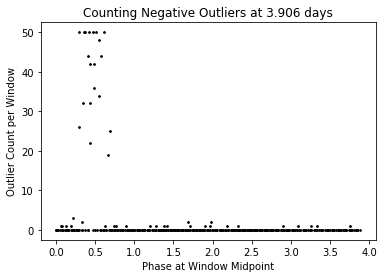

[0.01238454 0.016145   0.02548484 0.02727468 0.03667564 0.03895876
 0.04189975 0.08182745 0.08697834 0.10227276 0.1075087  0.11020458
 0.11117863 0.11273243 0.15127035 0.15642277 0.17310427 0.18062081
 0.18773173 0.20473052 0.22210211 0.22586721 0.24532463 0.25856439
 0.26256258 0.27417468 0.291545   0.29670052 0.31615613 0.3219958
 0.32800818 0.33103139 0.33200474 0.34361884 0.36098788 0.37864494
 0.38837649 0.39144041 0.39745197 0.4014469  0.41306298 0.43043076
 0.45225603 0.460885   0.46689575 0.46991616 0.47088905 0.47170765
 0.48250713 0.49987364 0.52308933 0.53032957 0.53633952 0.5403312
 0.54115029 0.55195126 0.57070536 0.59392263 0.59977413 0.60578329
 0.60977333 0.61059292 0.62139513 0.64292594 0.66921868 0.67308925
 0.67522706 0.67921546 0.68003554 0.69083897 0.7123688  0.73866322
 0.74467082 0.74531142 0.74865757 0.74907449 0.74947816 0.76306055
 0.78181165 0.80810775 0.81411458 0.81475581 0.81892078 0.81948851
 0.83250437 0.8512545  0.87755227 0.88494721 0.88836339 0.888366

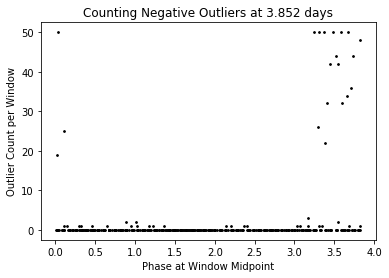

In [420]:
def gridfreqcount_new(lc, upper=4.2, lower=3.8, N=15):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/upper, 1/lower, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ## Pos outlier removal above
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        windows = window(col, w=50, o=50)
        window_phase = window(phase, w=50, o=50)
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        #print(counts)
        print(np.sort(window_phase[:,0]))
        plt.scatter(window_phase[:,0], counts, marker="o", color="k", s=3)
        #plt.scatter(phase, (flux_mad)*1e6, marker=".", color="k", s=3)
        plt.title("Counting Negative Outliers at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase at Window Midpoint")
        plt.ylabel("Outlier Count per Window")
        #plt.savefig(os.path.join(downloadDir,"NegCount_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    #return periods
    
gridfreqcount_new(lcTransit, upper=4.2, lower=3.8, N=10)

In [31]:
#lcNew = lcTransit.copy()
#lcNew.flux = removetrans(lcTransit)+1

## Applying CDF to the Outlier Count

In [195]:
#from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as ss

In [ ]:
index = np.argsort(phase)

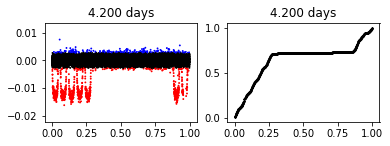

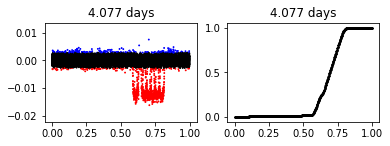

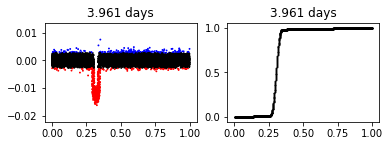

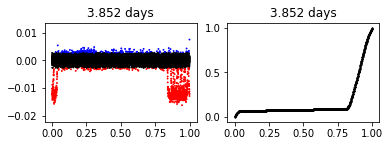

In [478]:
def countcdf(lc,N=5):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        std = np.std(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*MAD, 0, flux_nomad)
        ## Pos outlier removal above
        
        #Color key
        colo = ['k']*len(phase)
        colo = np.array(colo)
        colo[np.where(flux_nomad >= 4*mad)] = 'b'
        colo[np.where(flux_nomad <= -4*mad)] = 'r'
        #Color key
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        windows = window(col, w=100, o=10)
        window_phase = window(phase, w=100, o=10)
        #print(window_phase[:,35]) #THESE are the windows, the index w/ 35. I should maybe match them with windows of counts?
        windows_new = window(flux_nomad, w=100, o=10)
        xphase = window_phase[:,0]
        counts = []
        #phase_counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
            #phase_count = window_phase[j]
            #phase_counts.append(phase_count)
            
        #counts_new = []
        #for k in range(0, len(windows_new)):
            #MAD_new = stats.median_absolute_deviation(windows_new[k,:])
            #std = np.std(windows_new[k,:])
            #col = [0]*len(windows_new[k,:])
            #col = np.array(col)
            #col[np.where(windows_new[k,:] <= -4*MAD)] = 1
            #outlier_count = np.count_nonzero(col)
            #counts_new.append(outlier_count)
        ##Counting neg outlier above
        
        ##CDF below
        c_cdf = np.sort(counts)
        y = c_cdf/c_cdf[-1]
        n = c_cdf.size
        y2 = np.arange(1,n+1) / n
        y3 = ss.norm.cdf(c_cdf)
        #p_cdf = np.sort(window_phase[:,0])
        #y_cdf = np.arange(1, len(x_cdf)+1) / len(x_cdf)
        #ecdf = ECDF(x)
        #test = ecdf(counts)
        #x_new = np.sort(counts_new)
        #print(x_new)
        #y_new = np.arange(1,n+1) / n
        
        index = np.argsort(xphase)
        counts_new = np.array(counts)
        counts_new = counts_new[index]
        counts_cdf = np.cumsum(counts_new)
        n = len(counts_cdf)
        y4 = np.arange(1,n+1)/n
        y5 = counts_cdf/counts_cdf[-1]
    
        ##CDF above
        plt.subplot(2, 2, 1)
        plt.scatter(phase, (lcTransit.flux-1.), marker=".", c=colo, s=3)
        plt.title("{} days".format('%.3f'%(period)))
        plt.subplot(2, 2, 2)
        plt.scatter(np.sort(xphase), y5, marker=".", color="k", s=3)
        #plt.scatter(np.sort(xphase), y4, marker=".", color="k", s=3)
        #plt.scatter(x, y, marker="o", color="k", s=3)
        plt.title("{} days".format('%.3f'%(period)))
        #plt.xlabel("Cumulative Sum of Counts")
        #plt.ylabel("Cumulative Probability")
        #plt.savefig(os.path.join(downloadDir,"CountCDF_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    #return periods

countcdf(lcTransit)

## Shifitng the CDF to Middle

x=0 occurs where y=0.5 $\checkmark$ 

Domain of x is (-0.5, 0.5) $\checkmark$

y continuously increases from 0 to 1 $\checkmark$

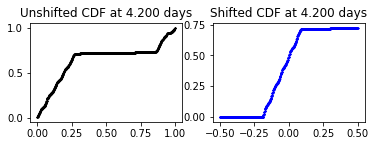

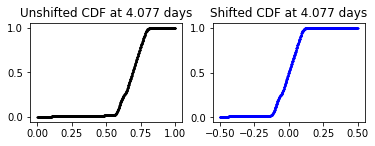

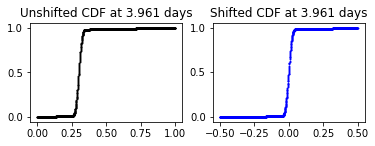

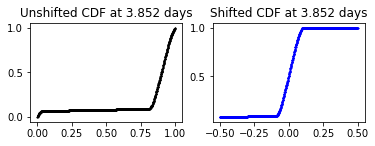

In [606]:
def countcdf(lc,N=5):
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        flux_nomad = lc.flux-1
        
        ##Counting neg outlier below
        MAD = stats.median_absolute_deviation(flux_nomad)
        #flux_mad = np.where(flux_nomad > 4*MAD, 0, flux_nomad)
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        windows = window(col, w=100, o=10)
        window_phase = window(phase, w=100, o=10)
        windows_new = window(flux_nomad, w=100, o=10)
        xphase = window_phase[:,0]
        xs = np.sort(xphase)
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        ##CDF below
        index = np.argsort(xphase)
        counts_new = np.array(counts)
        counts_new = counts_new[index]
        counts_cdf = np.cumsum(counts_new)
        #n = len(counts_cdf)
        #y4 = np.arange(1,n+1)/n
        y = counts_cdf/counts_cdf[-1]
        ##CDF above
        
        ###Determining middle
        middle = min(y, key=lambda x: abs(x - 0.5)) #Finds the element of the y array closest to 0.5
        #print('y midpoint = ' + str(middle))
        midindex = list(y).index(middle)
        #print('x value at y midpoint = ' + str(xs[midindex]))
        phase_shift = xs - xs[midindex]
        y_shift = y.copy()
        for j in range (0, len(phase_shift)):
            if phase_shift[j] < -0.5:
                phase_shift[j] = phase_shift[j]+1
                y_shift[j] = 1
            if phase_shift[j] > 0.5:
                phase_shift[j] = phase_shift[j]-1
                y_shift[j] = 0
            else:
                phase_shift[j]=phase_shift[j]
                y_shift[j] = y_shift[j]
        ###Determining middle
        
        plt.subplot(2, 2, 1)
        plt.scatter(xs, y, marker=".", color="k", s=3)
        plt.title("Unshifted CDF at {} days".format('%.3f'%(period)))
        plt.subplot(2, 2, 2)
        plt.scatter(phase_shift, y_shift, marker=".", color="b", s=3)
        plt.title("Shifted CDF at {} days".format('%.3f'%(period)))
        #plt.savefig(os.path.join(downloadDir,"ShiftedCDF_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()

countcdf(lcTransit)

## Minimization Routine

In [572]:
from scipy.optimize import minimize

In [607]:
time = max(lc_load.time)-min(lc_load.time)
for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
    period = 1/i
    phase = (lc_load.time % period) / period
    flux_nomad = lc_load.flux-1
        
    ##Counting neg outlier below
    MAD = stats.median_absolute_deviation(flux_nomad)
    #flux_mad = np.where(flux_nomad > 4*MAD, 0, flux_nomad)
    col = [0]*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
    windows = window(col, w=100, o=10)
    window_phase = window(phase, w=100, o=10)
    windows_new = window(flux_nomad, w=100, o=10)
    xphase = window_phase[:,0]
    xs = np.sort(xphase)
    counts = []
    for j in range(0, len(windows)):
        outlier_count = np.count_nonzero(windows[j])
        counts.append(outlier_count)
    ##Counting neg outlier above
        
    ##CDF below
    index = np.argsort(xphase)
    counts_new = np.array(counts)
    counts_new = counts_new[index]
    counts_cdf = np.cumsum(counts_new)
    y = counts_cdf/counts_cdf[-1]
    ##CDF above
        
    ###Determining middle
    middle = min(y, key=lambda x: abs(x - 0.5)) #Finds the element of the y array closest to 0.5
    #print('y midpoint = ' + str(middle))
    midindex = list(y).index(middle)
    #print('x value at y midpoint = ' + str(xs[midindex]))
    phase_shift = xs - xs[midindex]
    y_shift = y.copy()
    for j in range (0, len(phase_shift)):
        if phase_shift[j] < -0.5:
            phase_shift[j] = phase_shift[j]+1
            y_shift[j] = 1
        if phase_shift[j] > 0.5:
            phase_shift[j] = phase_shift[j]-1
            y_shift[j] = 0
        else:
            phase_shift[j]=phase_shift[j]
            y_shift[j] = y_shift[j]
    ###Determining middle
    
    #minimization
    def objective(x):
        return (np.sort(x))[midindex]
    #constraint =
    x0 = np.linspace(-0.5, 0.5, num=len(phase_shift))
    print(objective(x0))
    sol = minimize(objective, x0, method='SLSQP')
    print(sol)
    #plt.scatter(phase_shift, y_shift, marker=".", color="k", s=3)
    #plt.show()

-0.30989438576987216
     fun: -0.3654808226792663
     jac: array([0., 0., 0., ..., 0., 0., 0.])
 message: 'Iteration limit exceeded'
    nfev: 182802
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([-0.5       , -0.49944414, -0.49888827, ...,  0.49888827,
        0.49944414,  0.5       ])
-0.3343524180100056
     fun: -0.38993885491939967
     jac: array([0., 0., 0., ..., 0., 0., 0.])
 message: 'Iteration limit exceeded'
    nfev: 182802
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([-0.5       , -0.49944414, -0.49888827, ...,  0.49888827,
        0.49944414,  0.5       ])
-0.36214563646470266
     fun: -0.41773207337409674
     jac: array([0., 0., 0., ..., 0., 0., 0.])
 message: 'Iteration limit exceeded'
    nfev: 182802
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([-0.5       , -0.49944414, -0.49888827, ...,  0.49888827,
        0.49944414,  0.5       ])
-0.3949416342412451
     fun: -0.45052807115063925


## Polynomial Fit of CDF

y midpoint = 0.5027229819678083
x value at y midpoint = 0.18682440016597954


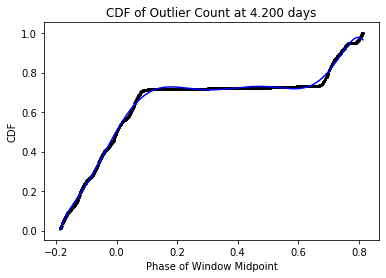

y midpoint = 0.49630884666585984
x value at y midpoint = 0.6906571507557648


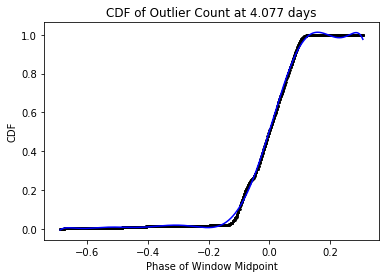

y midpoint = 0.5055064746460124
x value at y midpoint = 0.30236414091972913


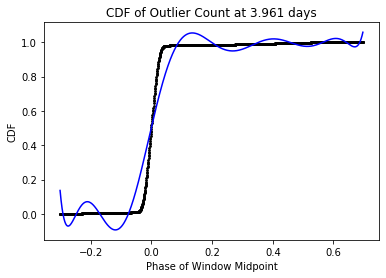

y midpoint = 0.4995764250272298
x value at y midpoint = 0.9020477303174674


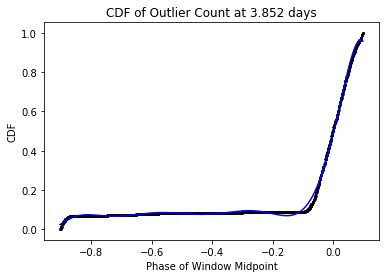

In [530]:
def countpolyfit(lc,N=5):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ## Pos outlier removal above
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        #print(len(col))
        windows = window(col, w=100, o=10)
        window_phase = window(phase, w=100, o=10)
        x = window_phase[:,0]
        xs = np.sort(x)
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        ##CDF below
        c_cdf = np.sort(counts)
        y = c_cdf/c_cdf[-1]
        ##CDF above
        
        ##NEW CDF below
        index = np.argsort(x)
        counts_new = np.array(counts)
        counts_new = counts_new[index]
        counts_cdf = np.cumsum(counts_new)
        n = len(counts_cdf)
        y = counts_cdf/counts_cdf[-1]
        ##NEW CDF above
        
        #Determining middle
        middle = min(y, key=lambda x: abs(x - 0.5)) #Finds the element of the y array closest to 0.5
        print('y midpoint = ' + str(middle))
        midindex = list(y).index(middle)
        print('x value at y midpoint = ' + str((np.sort(x))[midindex]))
        phase_shift = np.sort(x) - (np.sort(x))[midindex]
        #Determining middle
        
        ##Polyfit below
        xp = np.linspace(min(phase_shift), max(phase_shift), len(phase_shift))
        coefficients = np.polyfit(phase_shift, y, deg=10) #test with deg=1 to see if the mean of the cdf appears
        polynomial = np.poly1d(coefficients)
        #print(polynomial)
        yp = polynomial(xp)
        ##Polyfit above
        
        plt.scatter(phase_shift, y, marker="o", color="k", s=3)
        plt.plot(xp, yp, 'b-')
        plt.title("CDF of Outlier Count at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase of Window Midpoint")
        plt.ylabel("CDF")
        #plt.savefig(os.path.join(downloadDir,"CountCDF_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    #return periods

countpolyfit(lcTransit)

## Derivative of Polynomial Fit

In [545]:
def countpolyfit(lc,N=5):
    steeps=[]
    periods=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ## Pos outlier removal above
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        #print(len(col))
        windows = window(col, w=100, o=10)
        window_phase = window(phase, w=100, o=10)
        x = window_phase[:,0]
        xs = np.sort(x)
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        ##NEW CDF below
        index = np.argsort(x)
        counts_new = np.array(counts)
        counts_new = counts_new[index]
        counts_cdf = np.cumsum(counts_new)
        n = len(counts_cdf)
        y = counts_cdf/counts_cdf[-1]
        ##NEW CDF above
        
        #Determining middle
        middle = min(y, key=lambda x: abs(x - 0.5)) #Finds the element of the y array closest to 0.5
        midindex = list(y).index(middle)
        phase_shift = np.sort(x) - (np.sort(x))[midindex]
        #Determining middle
        
        ##Polyfit below
        xp = np.linspace(min(phase_shift), max(phase_shift), len(phase_shift))
        coefficients = np.polyfit(phase_shift, y, deg=5) #test with deg=1 to see if the mean of the cdf appears
        polynomial = np.poly1d(coefficients)
        print(polynomial)
        derivative = np.polyder(polynomial)
        print(derivative)
        yp = polynomial(xp)
        yd = derivative(xp)
        ##Polyfit above
        steep = np.amax(yd) #I believe this might work, if my plots were correct
        print('Max value of derivative = ' + str(steep))
        plt.scatter(phase_shift, y, marker="o", color="k", s=3)
        plt.plot(xp, yp, 'b-')
        plt.plot(xp, yd, 'r-')
        plt.title("CDF of Outlier Count at {} days".format('%.3f'%(period)))
        #plt.xlabel("Phase of Window Midpoint")
        plt.ylabel("CDF")
        #plt.savefig(os.path.join(downloadDir,"CountCDF_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        steeps.append(steep)
        periods.append(period)
    maxindex = np.argmax(steeps)
    print('Predicted period = ' + str(periods[maxindex]))
    return periods[maxindex] #Returns the period which produces the steepest CDF

#countpolyfit(lcTransit)